Import the dependencies

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Import dataset

In [172]:
iris = sklearn.datasets.load_iris(as_frame=True)

In [173]:
data = iris.data
data.head()
#data.isnull().sum()
#data.isna().sum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

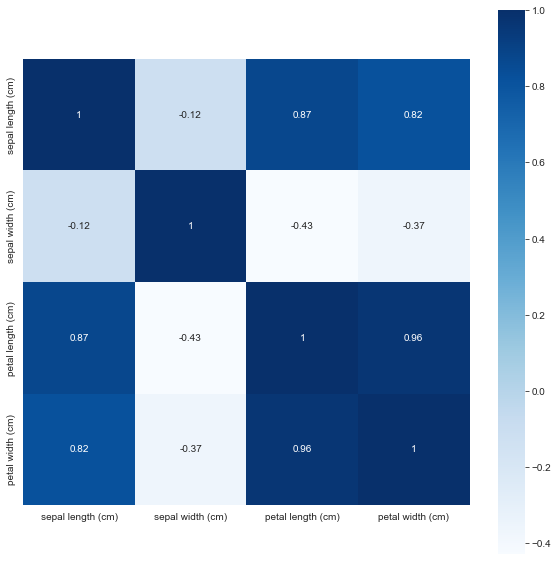

In [174]:
## check correlation
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="Blues", square=True, annot=True)

In [175]:
## pick only sepal
petal = data.iloc[ :,2:4]
petal.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [176]:
## separate variables
X = petal.iloc[:,0:1].values
Y = petal[("petal width (cm)")].values

In [177]:
print(X)

[[1.4]
 [1.4]
 [1.3]
 [1.5]
 [1.4]
 [1.7]
 [1.4]
 [1.5]
 [1.4]
 [1.5]
 [1.5]
 [1.6]
 [1.4]
 [1.1]
 [1.2]
 [1.5]
 [1.3]
 [1.4]
 [1.7]
 [1.5]
 [1.7]
 [1.5]
 [1. ]
 [1.7]
 [1.9]
 [1.6]
 [1.6]
 [1.5]
 [1.4]
 [1.6]
 [1.6]
 [1.5]
 [1.5]
 [1.4]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.3]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.6]
 [1.9]
 [1.4]
 [1.6]
 [1.4]
 [1.5]
 [1.4]
 [4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]
 [4.5]
 [4.7]
 [3.3]
 [4.6]
 [3.9]
 [3.5]
 [4.2]
 [4. ]
 [4.7]
 [3.6]
 [4.4]
 [4.5]
 [4.1]
 [4.5]
 [3.9]
 [4.8]
 [4. ]
 [4.9]
 [4.7]
 [4.3]
 [4.4]
 [4.8]
 [5. ]
 [4.5]
 [3.5]
 [3.8]
 [3.7]
 [3.9]
 [5.1]
 [4.5]
 [4.5]
 [4.7]
 [4.4]
 [4.1]
 [4. ]
 [4.4]
 [4.6]
 [4. ]
 [3.3]
 [4.2]
 [4.2]
 [4.2]
 [4.3]
 [3. ]
 [4.1]
 [6. ]
 [5.1]
 [5.9]
 [5.6]
 [5.8]
 [6.6]
 [4.5]
 [6.3]
 [5.8]
 [6.1]
 [5.1]
 [5.3]
 [5.5]
 [5. ]
 [5.1]
 [5.3]
 [5.5]
 [6.7]
 [6.9]
 [5. ]
 [5.7]
 [4.9]
 [6.7]
 [4.9]
 [5.7]
 [6. ]
 [4.8]
 [4.9]
 [5.6]
 [5.8]
 [6.1]
 [6.4]
 [5.6]
 [5.1]
 [5.6]
 [6.1]
 [5.6]
 [5.5]
 [4.8]
 [5.4]
 [5.6]
 [5.1]
 [5.1]

In [193]:
class LR:

    def __init__(self, n_features):
        self.learning_rate = 0.01
        self.epochs = 10 #n of iterations
        self.__initial_params(n_features)


    def __initial_params(self, n_features):
        #initialize weigth and bias as zero
        self.w = np.zeros(n_features)
        self.b = 0
        return True

    def predictions(self, X):
        return np.dot(self.w,X.T) + self.b

    def cost(self, X, Y):
        L = 1/(2*len(X))*np.sum((self.predictions(X) - Y)**2)
        return L

    def gradient(self, X, Y):
        for iteration in range(self.epochs):
            m = len(X) # number of examples
            # predictions
            predictions = self.predictions(X)
            # error
            error = predictions - Y
            # derivates
            dFdW = 1/m * np.dot(error, X)
            dFdB = 1/m * np.sum(error)
            #update parameters
            self.w = self.w - self.learning_rate*dFdW
            self.b = self.b - self.learning_rate*dFdB

        return self.w, self.b


In [195]:
n_features = X.shape[1]
model = LR(n_features)
model.gradient(X, Y)

(array([0.26506729]), 0.1697072899022124)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
model.gradient(X_train, y_train)

(array([0.28163056]), 0.28332961330489337)

Linear regression from scratch using Gradient Descent